In [1]:
import pandas as pd
# import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from yahooquery import Ticker

In [29]:
tick = Ticker("AAPL")
stock_hist = tick.history("max")
df = stock_hist['close']

In [30]:
df = df.to_frame().reset_index()
#df

In [31]:
df.head()

,symbol,date,close
0,AAPL,1980-12-12,0.128348
1,AAPL,1980-12-15,0.121652
2,AAPL,1980-12-16,0.112723
3,AAPL,1980-12-17,0.115513
4,AAPL,1980-12-18,0.118862


In [32]:

import pandas as pd


In [33]:
df_for_training = df

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#df_for_training = sc.fit_transform(df_for_training)


In [35]:
#df_for_training

In [36]:
# Creating dataset
train_X = []
#train_Y = []
#n_past = 200
n_past = 14
n_future = 1

In [79]:
df_for_training = df[['close']].values

In [80]:
df_for_training

array([[1.28347993e-01],
       [1.21652000e-01],
       [1.12723000e-01],
       ...,
       [1.53830002e+02],
       [1.51600006e+02],
       [1.52869995e+02]])

In [38]:
for i in range(len(df_for_training)-n_past-1):
		a = df_for_training[i:(i+n_past), 0]   ###i=0, 0,1,2,3-----99   100 
		train_X.append(a)
		

In [39]:
train_X = np.array(train_X)

In [40]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], n_future)
train_X.shape

(10633, 14, 1)

In [41]:
train_X[-1:].shape

(1, 14, 1)

In [42]:
train_X[-1].reshape(-1, 1).shape

(14, 1)

In [43]:
temp = train_X[-1].reshape(-1, 1)

In [44]:
#temp

In [45]:
temp = sc.fit_transform(temp)

In [46]:
#temp_for = temp
li = []

In [47]:
#temp_for

In [48]:
# loading model from tensorflow import keras 
# model using 14steps
#from tensorflow import keras
#model = keras.models.load_model("de_lstm_14days.h5")

In [49]:
# creating for loop for n number of prediction
def pred_and_load(days, temp_for):
    from tensorflow import keras
    timestamp = n_past
    model = keras.models.load_model("de_lstm_14days.h5")
    li = []
    for i in range(days):
        x_input_for = temp_for.reshape(1, temp_for.shape[0],1)
        pred_for = model.predict(x_input_for).flatten()
        li.append(pred_for)
        next_for = np.append(temp_for,pred_for)
        temp_for = next_for[-timestamp:]
    return li

In [50]:
days = 365

In [51]:
#li

In [52]:
li = pred_and_load(days, temp)

2023-03-09 19:32:29.827503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 19:32:30.203636: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 19:32:30.203686: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-09 19:32:31.298576: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

1/1 [==============================] - 0s 40ms/step


In [218]:
#li

In [53]:
arr = np.array(li)

In [56]:
#arr

array([[0.04465747],
       [0.4949832 ],
       [0.5935217 ],
       [0.46466684],
       [0.26612794],
       [0.09146297],
       [0.03218746],
       [0.11543357],
       [0.25053656],
       [0.43251407],
       [0.5786598 ],
       [0.6076572 ],
       [0.5806166 ],
       [0.57855153],
       [0.56533134],
       [0.48561347],
       [0.4500078 ],
       [0.45344877],
       [0.48774362],
       [0.5384947 ],
       [0.5881169 ],
       [0.6256136 ],
       [0.64816374],
       [0.6543201 ],
       [0.6497794 ],
       [0.64137   ],
       [0.6337494 ],
       [0.6323099 ],
       [0.64202803],
       [0.66184586],
       [0.68431073],
       [0.7063582 ],
       [0.7248878 ],
       [0.7383422 ],
       [0.7469954 ],
       [0.75244135],
       [0.7570126 ],
       [0.7630339 ],
       [0.7718836 ],
       [0.7838526 ],
       [0.7982236 ],
       [0.8135841 ],
       [0.828484  ],
       [0.8420255 ],
       [0.85395736],
       [0.864456  ],
       [0.8741926 ],
       [0.883

In [220]:
#arr

In [54]:
y_pred_future = sc.inverse_transform(arr)

In [222]:
#y_pred_future

In [55]:
y_pred_future = y_pred_future.flatten()
y_pred_future

array([150.11932, 151.5387 , 151.84927, 151.44315, 150.81737, 150.26685,
       150.08002, 150.3424 , 150.76823, 151.3418 , 151.80243, 151.89383,
       151.80861, 151.8021 , 151.76042, 151.50917, 151.39694, 151.40779,
       151.51588, 151.67584, 151.83224, 151.95042, 152.0215 , 152.04091,
       152.0266 , 152.00009, 151.97607, 151.97153, 152.00217, 152.06462,
       152.13544, 152.20493, 152.26332, 152.30574, 152.33301, 152.35017,
       152.36458, 152.38356, 152.41145, 152.44917, 152.49448, 152.5429 ,
       152.58984, 152.63252, 152.67014, 152.70323, 152.73392, 152.76476,
       152.79782, 152.83417, 152.87364, 152.91518, 152.9573 , 152.99873,
       153.03864, 153.0769 , 153.11401, 153.15076, 153.18794, 153.22612,
       153.26552, 153.3059 , 153.34685, 153.38786, 153.42856, 153.46877,
       153.50851, 153.54803, 153.58762, 153.62749, 153.6678 , 153.70854,
       153.7496 , 153.7908 , 153.83197, 153.87303, 153.91394, 153.95474,
       153.99554, 154.03644, 154.07745, 154.11865, 

In [57]:
training_dates = pd.to_datetime(df["date"])

In [58]:
forecast_period_date = pd.date_range(list(training_dates)[-1], periods=days, freq="1d").tolist()

In [61]:
forecast_period_date

[Timestamp('2023-03-08 00:00:00', freq='D'),
 Timestamp('2023-03-09 00:00:00', freq='D'),
 Timestamp('2023-03-10 00:00:00', freq='D'),
 Timestamp('2023-03-11 00:00:00', freq='D'),
 Timestamp('2023-03-12 00:00:00', freq='D'),
 Timestamp('2023-03-13 00:00:00', freq='D'),
 Timestamp('2023-03-14 00:00:00', freq='D'),
 Timestamp('2023-03-15 00:00:00', freq='D'),
 Timestamp('2023-03-16 00:00:00', freq='D'),
 Timestamp('2023-03-17 00:00:00', freq='D'),
 Timestamp('2023-03-18 00:00:00', freq='D'),
 Timestamp('2023-03-19 00:00:00', freq='D'),
 Timestamp('2023-03-20 00:00:00', freq='D'),
 Timestamp('2023-03-21 00:00:00', freq='D'),
 Timestamp('2023-03-22 00:00:00', freq='D'),
 Timestamp('2023-03-23 00:00:00', freq='D'),
 Timestamp('2023-03-24 00:00:00', freq='D'),
 Timestamp('2023-03-25 00:00:00', freq='D'),
 Timestamp('2023-03-26 00:00:00', freq='D'),
 Timestamp('2023-03-27 00:00:00', freq='D'),
 Timestamp('2023-03-28 00:00:00', freq='D'),
 Timestamp('2023-03-29 00:00:00', freq='D'),
 Timestamp

In [62]:
forecast_dates = []
for time_i in forecast_period_date:
   forecast_dates.append(time_i.date())

In [63]:
forecast_dates

[datetime.date(2023, 3, 8),
 datetime.date(2023, 3, 9),
 datetime.date(2023, 3, 10),
 datetime.date(2023, 3, 11),
 datetime.date(2023, 3, 12),
 datetime.date(2023, 3, 13),
 datetime.date(2023, 3, 14),
 datetime.date(2023, 3, 15),
 datetime.date(2023, 3, 16),
 datetime.date(2023, 3, 17),
 datetime.date(2023, 3, 18),
 datetime.date(2023, 3, 19),
 datetime.date(2023, 3, 20),
 datetime.date(2023, 3, 21),
 datetime.date(2023, 3, 22),
 datetime.date(2023, 3, 23),
 datetime.date(2023, 3, 24),
 datetime.date(2023, 3, 25),
 datetime.date(2023, 3, 26),
 datetime.date(2023, 3, 27),
 datetime.date(2023, 3, 28),
 datetime.date(2023, 3, 29),
 datetime.date(2023, 3, 30),
 datetime.date(2023, 3, 31),
 datetime.date(2023, 4, 1),
 datetime.date(2023, 4, 2),
 datetime.date(2023, 4, 3),
 datetime.date(2023, 4, 4),
 datetime.date(2023, 4, 5),
 datetime.date(2023, 4, 6),
 datetime.date(2023, 4, 7),
 datetime.date(2023, 4, 8),
 datetime.date(2023, 4, 9),
 datetime.date(2023, 4, 10),
 datetime.date(2023, 4, 1

In [64]:
df_future = pd.DataFrame({"Date":np.array(forecast_dates), "Close":y_pred_future})

In [69]:
original = stock_hist["close"]
original = original.to_frame().reset_index()

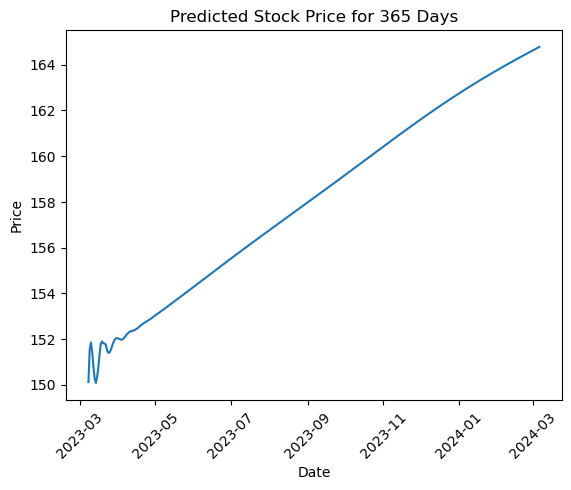

In [70]:
plt.title(f"Predicted Stock Price for {days} Days")
plt.plot(forecast_dates,  y_pred_future)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [75]:
from datetime import datetime, timedelta
if days < 365:
    back_days = 730
else:
    back_days = 1460

past_date = datetime.now() - timedelta(back_days)
# filter_date = datetime.strftime(past_date.date(), "%Y-%m-%d")
shorted = original[original['date'] > past_date.date()]

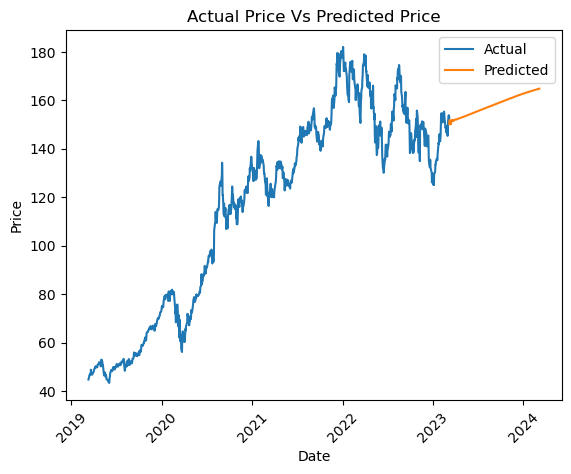

In [77]:
plt.title("Actual Price Vs Predicted Price")
plt.plot(shorted['date'], shorted['close'], label = 'Actual')
plt.plot(df_future["Date"], df_future["Close"], label="Predicted")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [78]:
df_future

,Date,Close
0,2023-03-08,150.119324
1,2023-03-09,151.538696
2,2023-03-10,151.849274
3,2023-03-11,151.443146
4,2023-03-12,150.817368
...,...,...
360,2024-03-02,164.657471
361,2024-03-03,164.686234
362,2024-03-04,164.714951
363,2024-03-05,164.743607
